In [130]:
# Importing Libraries
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

## Data Loading & Exploration

In [2]:
df = pd.read_csv('ratings.csv')

In [3]:
df.shape

(100836, 4)

In [4]:
df.duplicated().any()

False

In [5]:
# Finding any missing Values
print(f"Missing Values\n")

print(f"{df.isnull().sum()}")

Missing Values

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [6]:
# Printing data types
print("Data Types\n")
print(f"{df.dtypes}\n")

Data Types

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object



In [7]:
df.columns = ['userId', 'movieId', 'rating', 'timestamp']

In [10]:
# Getting ratings that are above 0
df = df[df['rating'] > 0]

In [9]:
df.shape

(100836, 4)

In [11]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
# Getting movie title
mv_t = pd.read_csv('movies.csv')

In [13]:
mv_t.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
# Merging movies data with ratings data by their MovieID
df = pd.merge(df,mv_t,on='movieId')

In [19]:
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


## Exploratory Data Analysis

In [16]:
# Grouping title by its mean ratings
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [17]:
# Grouping titles by its ratings count (given by user)
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [85]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [86]:
# Creating a new column which include how many ratings are given by users for each movie
ratings['Ratings Count'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [87]:
ratings.sort_values('Ratings Count',ascending=False).head(10)

,rating,Ratings Count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [96]:
ratings_over_X = ratings[ratings['Ratings Count'] > 50]
ratings_over_X

,rating,Ratings Count
title,,
10 Things I Hate About You (1999),3.527778,54
12 Angry Men (1957),4.149123,57
2001: A Space Odyssey (1968),3.894495,109
28 Days Later (2002),3.974138,58
300 (2007),3.681250,80
...,...,...
X-Men: The Last Stand (2006),3.355769,52
X2: X-Men United (2003),3.723684,76
Young Frankenstein (1974),3.992754,69


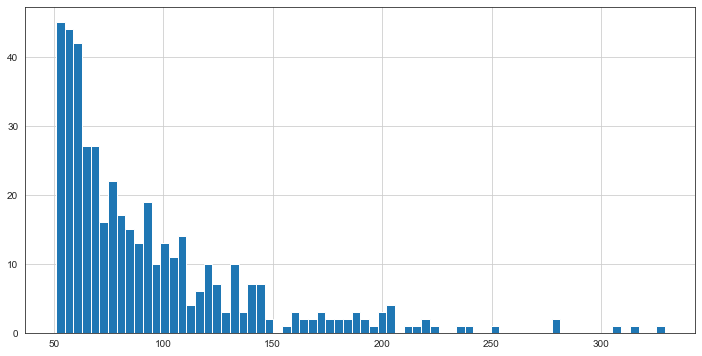

In [97]:
# Plotting ratings given by users for each movies
plt.figure(figsize=(12,6))
ratings_over_X['Ratings Count'].hist(bins=70)

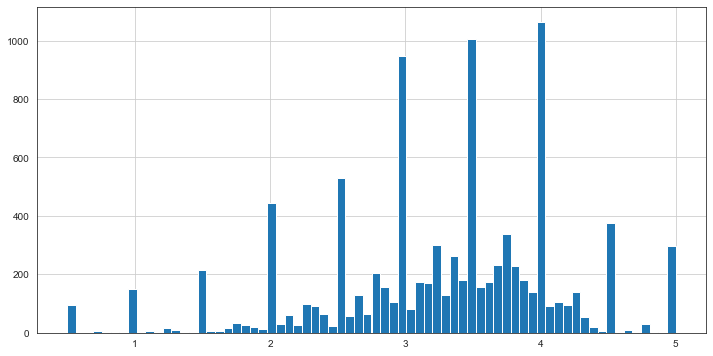

In [27]:
# Plotting distribution of ratings given by users
plt.figure(figsize=(12,6))
ratings['rating'].hist(bins=70)

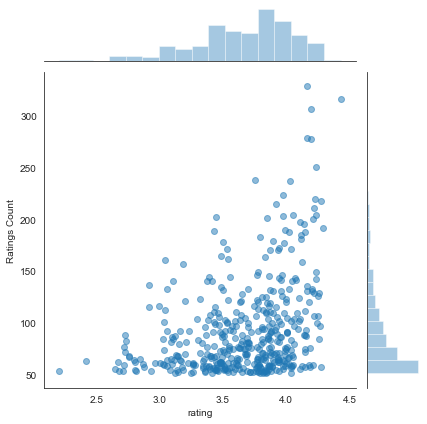

In [98]:
sns.jointplot(x='rating',y='Ratings Count',data=ratings_over_X,alpha=0.5)

## Recommending Movies

In [29]:
#Creating a matrix which has user ids on y axis and movie title on x axis. 
#Each cell now consists of rating give by a specific user to a specific movie.

In [123]:
mv_matrix = df.pivot_table(index='userId',columns='title',values='rating')

In [124]:
mv_matrix

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


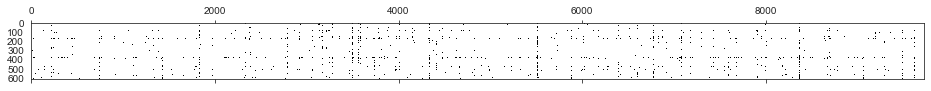

In [126]:
nan_find = np.isnan(mv_matrix)
mv_matrix[nan_find] = 0.0
plt.figure(figsize=(16,10))
plt.spy(mv_matrix)

In [32]:
# All the null values (NaN) are empty as most people have not watched all the movies

In [33]:
# Top rated movies

In [34]:
ratings.sort_values('Ratings Count',ascending=False).head(10)

,rating,Ratings Count
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


In [35]:
#Getting user ratings for a single movie to find correlations 

In [83]:
# Creating a function 
def getRecommendation(name, num= 10, matrix=mv_matrix):
    movie = matrix[name]
    
    #Using corrwith() to get correlations of the following pandas series
    movie_one = matrix.corrwith(movie)
    
    #Clening the data further to remove NaN values
    corr_movie = pd.DataFrame(movie_one, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    #Now we can sort the dataframe by correlation so we can get the similar movies
    #corr_movie.sort_values('Correlation', ascending = False)
    
    # Joining Ratings Count to corr_Forrest_Gump dataframe
    corr_movie = corr_movie.join(ratings['Ratings Count'])
    
    #Filtering out movies that have less than 100 reviews, as it will make a lot more sense
    corr_movie = corr_movie[corr_movie['Ratings Count']>100].sort_values('Correlation',ascending=False).head(num)
    
    # Removing first row, because its the movie itself
    corr_movie = corr_movie.iloc[1:]
    
    # Dropping Ratings count column (we dont need it)
    corr_movie = corr_movie.drop('Ratings Count', 1)
    
    return corr_movie

In [84]:
getRecommendation('Toy Story (1995)', num=10)

C:\Users\psidd\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\psidd\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"Incredibles, The (2004)",0.643301
Finding Nemo (2003),0.618701
Aladdin (1992),0.611892
"Monsters, Inc. (2001)",0.490231
Mrs. Doubtfire (1993),0.446261
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",0.438237
American Pie (1999),0.420117
Die Hard: With a Vengeance (1995),0.410939
E.T. the Extra-Terrestrial (1982),0.409216
